Graphical and quantitative check, if a given distribution is normal.
- For small sample-numbers (<50), you should use the Shapiro-Wilk test or the "normaltest"
- for intermediate sample numbers, the Lilliefors-test is good since the original Kolmogorov-Smirnov-test is unreliable when mean and std of the distribution
are not known.
- the Kolmogorov-Smirnov(Kolmogorov-Smirnov) test should only be used for large sample numbers (>300)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
from statsmodels.stats.diagnostic import lilliefors

In [2]:
def check_normality():
    """Check if the distribution is normal."""
    
    # Set the parameters
    numData = 800
    myMean = 0
    mySD = 3
    
    np.random.seed(1234)   
    
    # Generate and show random data
    data_norm = stats.norm.rvs(myMean, mySD, size=numData)
    data_t = stats.t.rvs(df=4, size=800)
    fewData = data_norm[:200]
    plt.hist(data_norm)
    plt.show()

    # --- >>> START stats <<< ---
    # Graphical test: if the data lie on a line, they are pretty much
    # normally distributed
    _ = stats.probplot(data_norm, plot=plt) # 正态概率图
    plt.show()

    pVals = pd.Series()
    pFewVals = pd.Series()
    # The scipy normaltest is based on D-Agostino and Pearsons test that
    # combines skew and kurtosis to produce an omnibus test of normality.
    _, pVals['Omnibus_norm']    = stats.normaltest(data_norm)
    _, pVals['Omnibus_t']    = stats.normaltest(data_t)
    _, pFewVals['Omnibus_norm'] = stats.normaltest(fewData)

    # Shapiro-Wilk test
    _, pVals['Shapiro-Wilk_norm']    = stats.shapiro(data_norm)
    _, pVals['Shapiro-Wilk_t']    = stats.shapiro(data_t)
    _, pFewVals['Shapiro-Wilk_norm'] = stats.shapiro(fewData)
    
    # Or you can check for normality with Lilliefors-test(n<=900)
    _, pVals['Lilliefors_norm']    = lilliefors(data_norm)
    _, pVals['Lilliefors_t']    = lilliefors(data_t)
    _, pFewVals['Lilliefors_norm'] = lilliefors(fewData)
    
    # Alternatively with original Kolmogorov-Smirnov test
    _, pVals['Kolmogorov-Smirnov']    = stats.kstest((data_norm-np.mean(data_norm))/np.std(data_norm,ddof=1), 'norm')
    _, pFewVals['Kolmogorov-Smirnov'] = stats.kstest((fewData-np.mean(fewData))/np.std(fewData,ddof=1), 'norm')
    
    print('p-values for all {0} data points: ----------------'.format(len(data_norm)))
    print(pVals, end='\n\n')
    print('p-values for the first 100 data points: ----------------')
    print(pFewVals)
    
    if pVals['Omnibus_norm'] > 0.05:
        print('Data are normally distributed')
    # --- >>> STOP stats <<< ---

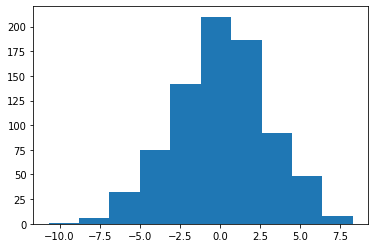

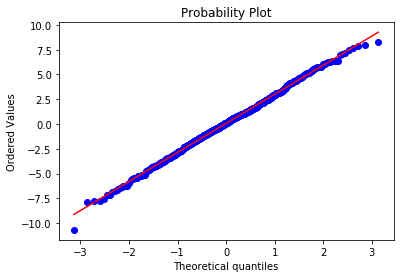

p-values for all 800 data points: ----------------
Omnibus_norm          7.979383e-01
Omnibus_t             5.270709e-24
Shapiro-Wilk_norm     6.729259e-01
Shapiro-Wilk_t        1.946545e-17
Lilliefors_norm       2.000000e-01
Lilliefors_t          3.942751e-10
Kolmogorov-Smirnov    8.617965e-01
dtype: float64

p-values for the first 100 data points: ----------------
Omnibus_norm          0.079498
Shapiro-Wilk_norm     0.195156
Lilliefors_norm       0.200000
Kolmogorov-Smirnov    0.869880
dtype: float64
Data are normally distributed


In [3]:
if __name__ == '__main__':
    check_normality()    